In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine_dataset = pd.read_csv("wine.csv")

In [4]:
wine_dataset.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine_dataset["Type"].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [6]:
df = wine_dataset.copy()

#  Task 1

In [7]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [8]:
len(df.columns)

14

In [9]:
df.shape

(178, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# EDA

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

### Outlier Detection

In [14]:
df.corr() 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [15]:
df.corr()["Flavanoids"]

Type              -0.847498
Alcohol            0.236815
Malic             -0.411007
Ash                0.115077
Alcalinity        -0.351370
Magnesium          0.195784
Phenols            0.864564
Flavanoids         1.000000
Nonflavanoids     -0.537900
Proanthocyanins    0.652692
Color             -0.172379
Hue                0.543479
Dilution           0.787194
Proline            0.494193
Name: Flavanoids, dtype: float64

<Axes: >

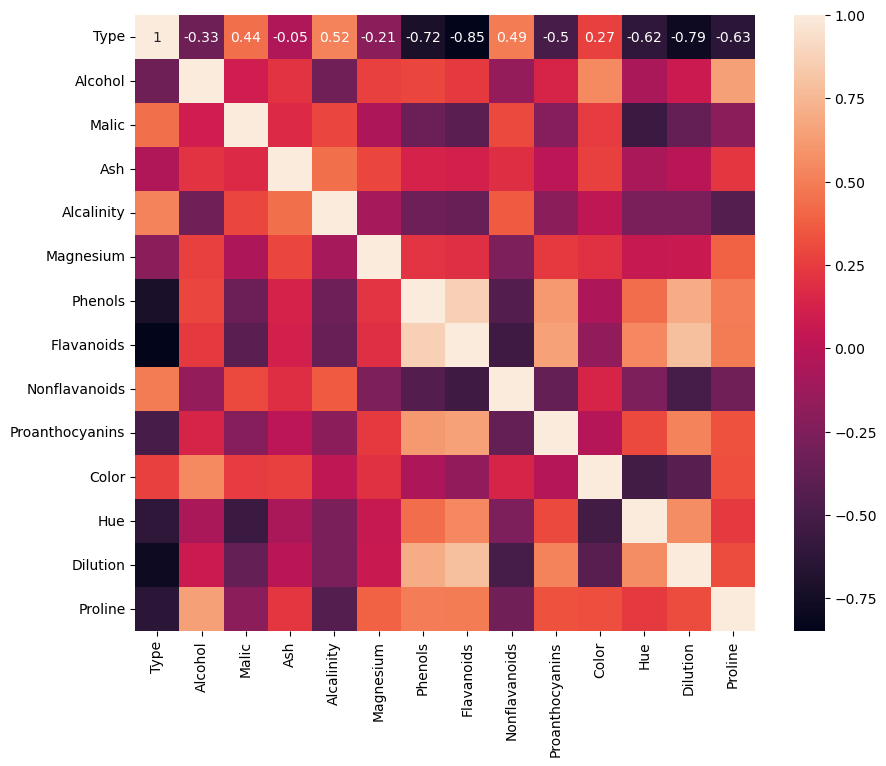

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [17]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Feature Scaling:

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df))
scaled_df.columns = wine_dataset.columns
scaled_df.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


# Task - 2

### PCA Alg = 1

In [19]:
from sklearn.decomposition import PCA

In [20]:
model_1 = PCA(n_components=0.99)

In [21]:
p_components = model_1.fit_transform(scaled_df)
p_components

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [22]:
exp_var = model_1.explained_variance_ratio_
exp_var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [23]:
np.cumsum(np.round(exp_var, decimals=4)*100)

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

In [24]:
np.cumsum(exp_var)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055])

In [25]:
model_1.n_components_

13

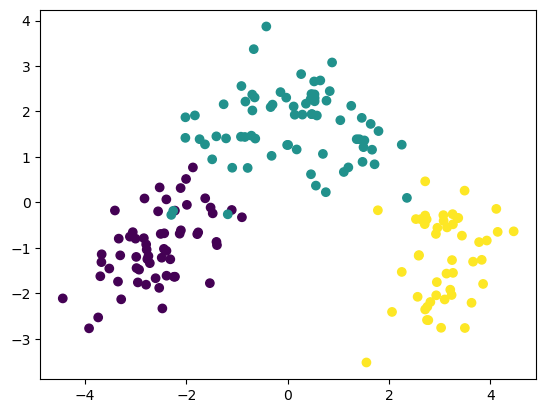

In [26]:
plt.scatter(p_components[:,0],p_components[:,1], c=df['Type'])

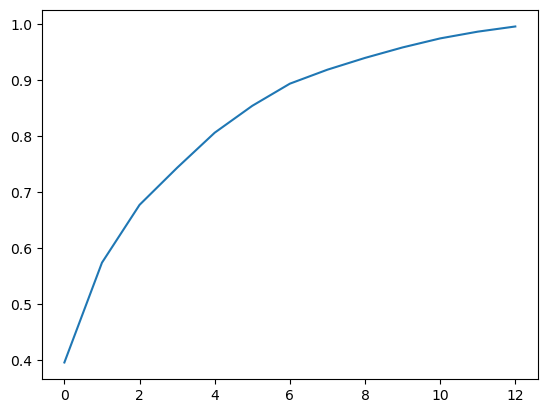

In [27]:
plt.plot(np.cumsum(model_1.explained_variance_ratio_))

In [28]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Due to high corelation remove Flavanoids

### Model _2

In [29]:
scaled_df.drop(columns=['Flavanoids'], inplace=True)
scaled_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [30]:
from sklearn.decomposition import PCA
model_2 = PCA(n_components=0.99)

In [31]:
p_components = model_2.fit_transform(scaled_df)
print(p_components)
print("--------")
exp_var = model_2.explained_variance_ratio_
print(exp_var)

[[ 3.40040600e+00 -1.45052937e+00  1.17128060e-03 ...  9.75595206e-01
  -4.08082427e-01  5.40861767e-01]
 [ 2.48692553e+00  3.32450441e-01 -1.93508268e+00 ... -7.23369586e-02
  -1.41627824e-01  3.84408260e-01]
 [ 2.47507821e+00 -1.03612649e+00  9.94356569e-01 ...  6.42586231e-03
  -2.71947107e-01  3.45523291e-03]
 ...
 [-2.68824989e+00 -2.75699678e+00 -9.79693831e-01 ... -2.00632235e-01
   5.01551247e-01  7.03481327e-01]
 [-2.39051462e+00 -2.29443547e+00 -5.24781841e-01 ...  4.39285871e-01
   3.21400607e-01  3.42945242e-01]
 [-3.29498337e+00 -2.76305902e+00  8.81982851e-01 ... -9.10194492e-03
  -2.52017769e-01 -2.07524356e-01]]
--------
[0.36322733 0.19208238 0.10851521 0.07014426 0.06614494 0.05151513
 0.042388   0.02620608 0.02248849 0.01979799 0.0173567  0.01296815]


In [32]:
np.cumsum(exp_var)

array([0.36322733, 0.55530971, 0.66382492, 0.73396918, 0.80011411,
       0.85162924, 0.89401724, 0.92022332, 0.94271181, 0.9625098 ,
       0.9798665 , 0.99283465])

In [33]:
var_2 = model_2.explained_variance_ratio_
var_2

array([0.36322733, 0.19208238, 0.10851521, 0.07014426, 0.06614494,
       0.05151513, 0.042388  , 0.02620608, 0.02248849, 0.01979799,
       0.0173567 , 0.01296815])

In [34]:
np.cumsum(np.round(var_2, decimals=4)*100)

array([36.32, 55.53, 66.38, 73.39, 80.  , 85.15, 89.39, 92.01, 94.26,
       96.24, 97.98, 99.28])

In [35]:
model_2.n_components_

12

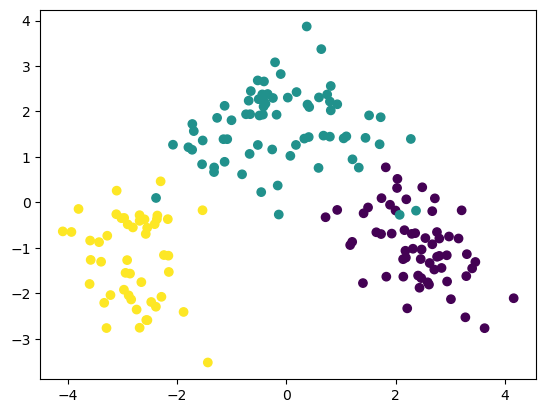

In [36]:
plt.scatter(p_components[:,0],p_components[:,1], c=df['Type'])

## Removing Outlier From datasets

### Model - 3

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


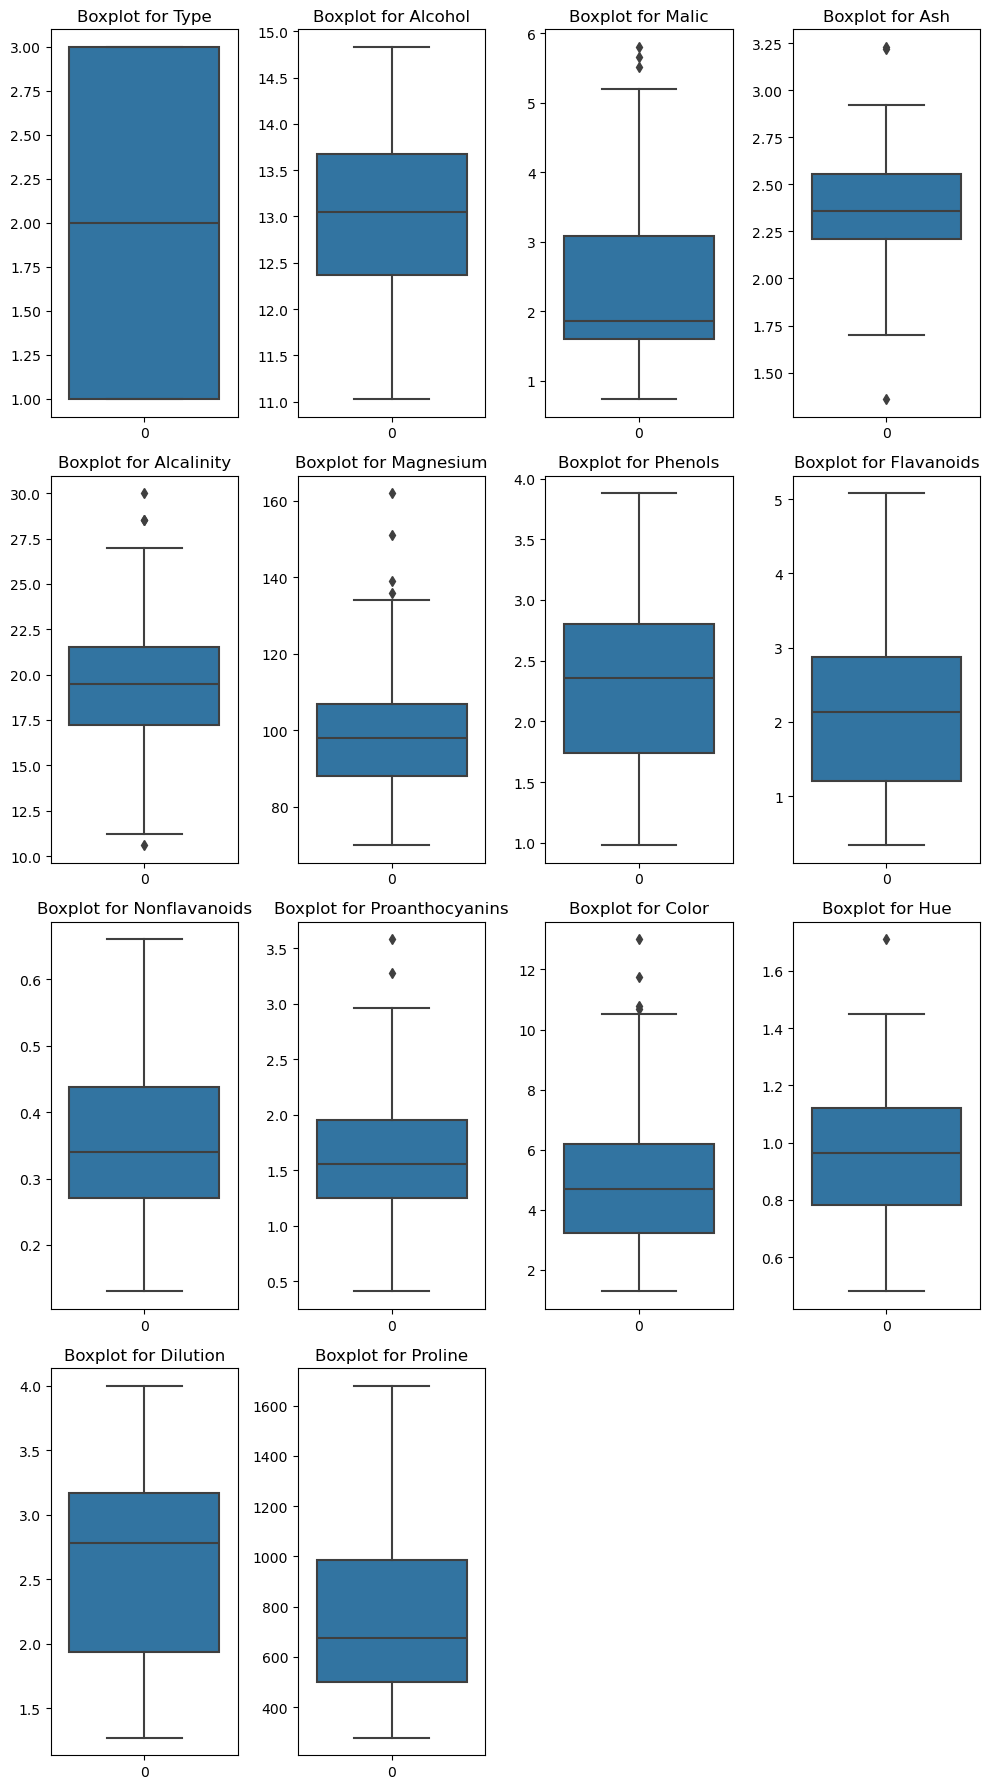

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(10,18))
axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axs[i])
    axs[i].set_title(f'Boxplot for {column}')
# Remove any unused subplots
for i in range(len(df.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [39]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
def outlier_detection(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3-q1
    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)
    return lower_extreme, upper_extreme, q1,q3

### Malic

In [41]:
outlier_detection(df, 'Malic') #upper

(-0.6174999999999997, 5.3025, 1.6025, 3.0825)

In [42]:
df[df["Malic"] > 5.3025]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


### Ash

In [43]:
outlier_detection(df, 'Ash') #upper and down

(1.6887499999999998, 3.0787500000000003, 2.21, 2.5575)

In [44]:
df[df["Ash"] > 3.0787500000000003]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [45]:
df[df["Ash"] < 1.7]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


### Alcalinity

In [46]:
outlier_detection(df, 'Alcalinity') #upper and down

(10.749999999999998, 27.950000000000003, 17.2, 21.5)

In [47]:
df[df["Alcalinity"] > 28]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [48]:
df[df["Alcalinity"] < 11]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


### Magnesium

In [49]:
outlier_detection(df, 'Magnesium') #upper

(59.5, 135.5, 88.0, 107.0)

In [50]:
df[df["Magnesium"] > 135.5]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [51]:
df.loc[df['Magnesium'] > 160, 'Magnesium'] = 140

### Proanthocyanins

In [52]:
outlier_detection(df, 'Proanthocyanins')  #upper

(0.20000000000000018, 3.0, 1.25, 1.95)

In [53]:
df[df["Proanthocyanins"] > 3.0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
95,2,12.47,1.52,2.20,19.0,140,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [54]:
df["Proanthocyanins"].min()

0.41

### Color

In [55]:
outlier_detection(df, 'Color') #upper

(-1.2500000000000009, 10.670000000000002, 3.2199999999999998, 6.2)

In [56]:
df[df["Color"] > 11]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
158,3,14.34,1.68,2.70,25.0,98,2.8,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.6,1.10,0.52,2.29,11.75,0.57,1.78,620


### Hue

In [57]:
outlier_detection(df, 'Hue')  #upper

(0.2762499999999998, 1.6262500000000002, 0.7825, 1.12)

In [58]:
df["Hue"].min()

0.48

In [59]:
df[df["Hue"] > 1.6262500000000002]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
115,2,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [60]:
df.loc[df['Hue'] > 3.75, 'Hue'] = 1.62

In [61]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
scaled_df.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-0.5,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,-0.5,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,-0.5,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728


In [62]:
model_3 = PCA()
pca_components = model_3.fit_transform(scaled_df)
model_3.explained_variance_

array([2.24415456, 1.27611861, 0.82280841, 0.50896703, 0.43647355,
       0.36982779, 0.30292582, 0.16530486, 0.13627416, 0.11582209,
       0.10445358, 0.06774967, 0.040936  , 0.01221088])

In [63]:
var_3 = model_3.explained_variance_ratio_
var_3

array([0.33981608, 0.1932334 , 0.12459192, 0.07706919, 0.06609203,
       0.05600034, 0.04586986, 0.02503092, 0.02063501, 0.0175381 ,
       0.01581665, 0.01025884, 0.00619864, 0.00184901])

In [64]:
# cummulative varaiance 
cummulative_varaiance = np.cumsum(np.round(var_3, decimals=4)*100)
cummulative_varaiance

array([33.98, 53.3 , 65.76, 73.47, 80.08, 85.68, 90.27, 92.77, 94.83,
       96.58, 98.16, 99.19, 99.81, 99.99])

In [65]:
model_3.components_   # Dimensional Components

array([[-0.22989205,  0.11546284, -0.28479897, -0.03769628, -0.29266864,
         0.14719262,  0.32245335,  0.35614126, -0.33063317,  0.37588584,
        -0.11516501,  0.29607963,  0.30547486,  0.26134975],
       [ 0.00883107, -0.38499376, -0.22387362, -0.42720693, -0.04552351,
        -0.34632844, -0.0888512 , -0.03781601, -0.01886083, -0.09903862,
        -0.55564448,  0.23464225,  0.09364972, -0.324043  ],
       [-0.02336359, -0.22394117, -0.0126828 ,  0.59078326,  0.60372423,
         0.07634567,  0.11308526,  0.13835229,  0.1341475 ,  0.16949706,
        -0.27412206,  0.17515469,  0.16632899, -0.13291097],
       [ 0.07025876, -0.08883455,  0.49715597, -0.25563614,  0.13108733,
        -0.20893897,  0.11245303,  0.08982502, -0.18894878,  0.61953306,
         0.05242384, -0.33700418,  0.09037901, -0.22157018],
       [ 0.08624579, -0.19916794,  0.03166839, -0.10565193,  0.10249875,
         0.71754617, -0.16019243, -0.1248416 , -0.54858939, -0.09717906,
        -0.15588489, -0.11

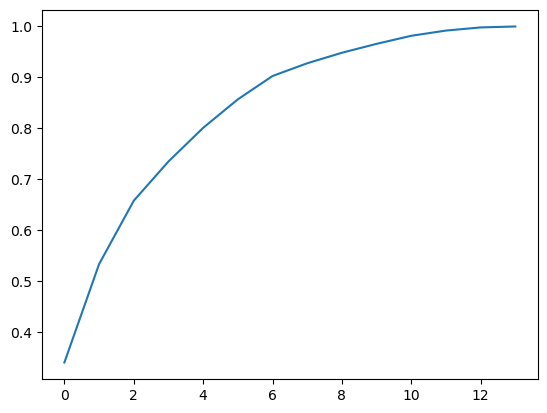

In [66]:
plt.plot(np.cumsum(model_3.explained_variance_ratio_))

# Clustering With K Means 

In [67]:
from sklearn.cluster import KMeans

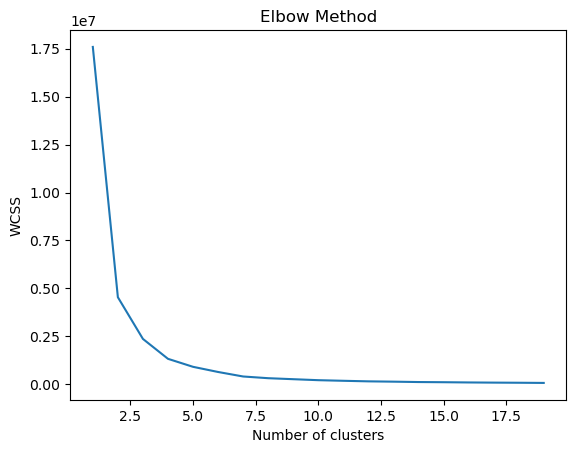

In [68]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=10) #max_iter=300 is default value.
    kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### k = 5

In [69]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,random_state=10) #max_iter=300 is default value.
kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe

KMeans(n_clusters=5, random_state=10)

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(df,kmeans.labels_)

0.5491679518821455

### k = 4

In [71]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=10) #max_iter=300 is default value.
kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
silhouette_score(df,kmeans.labels_)

0.560921332969841

## k = 2

In [72]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,random_state=10) #max_iter=300 is default value.
kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
silhouette_score(df,kmeans.labels_)

0.6569677500382071

In [73]:
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [74]:
df.shape

(178, 14)

# Task 3

### Clustering Using my orignal dataset 

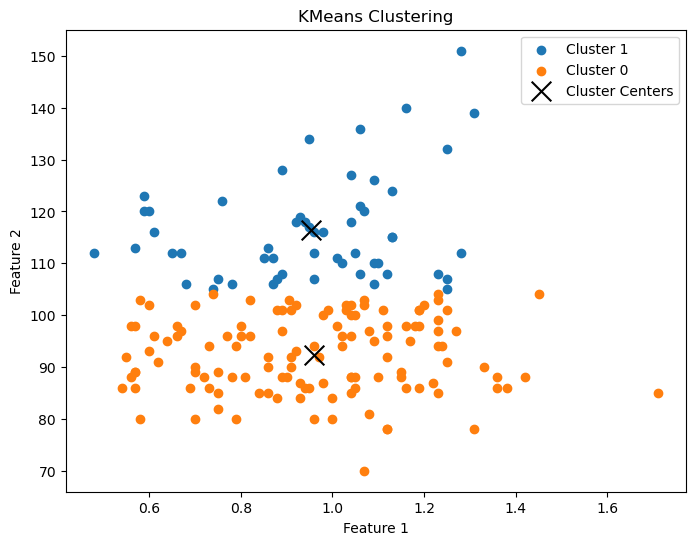

In [75]:
# Select features for clustering
features = ['Hue', 'Magnesium'] 

# Extract the selected features
X = df[features]

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Hue'], cluster_data['Magnesium'], label=f'Cluster {cluster}')

# Plot cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Cluster Centers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


# Task 4 

### Clustering With PCA 

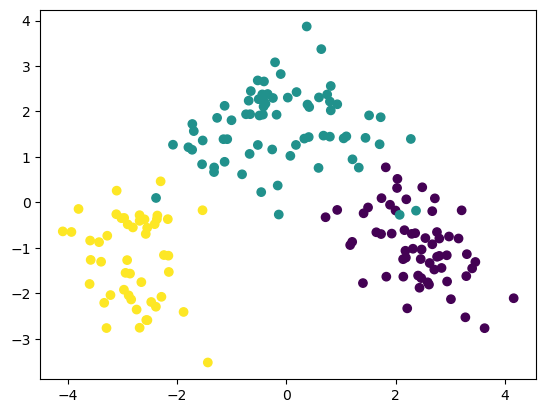

In [76]:
plt.scatter(p_components[:,0],p_components[:,1], c=df['Type'])

# Task - 5